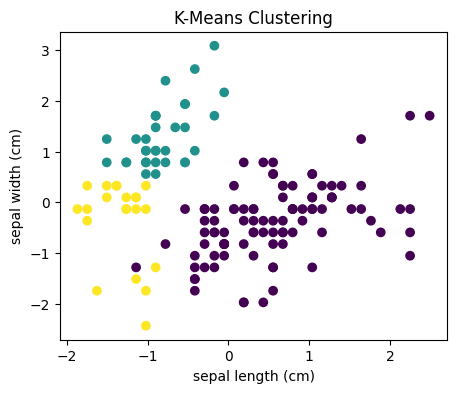

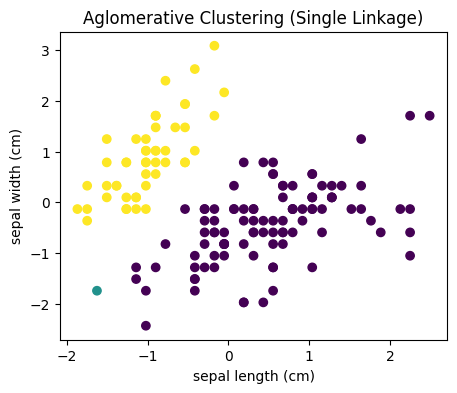

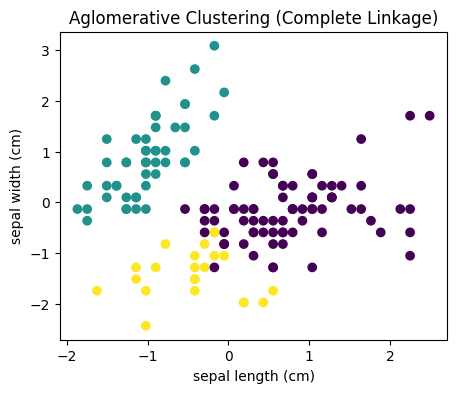

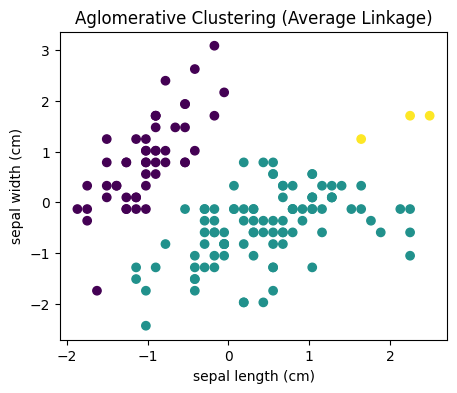

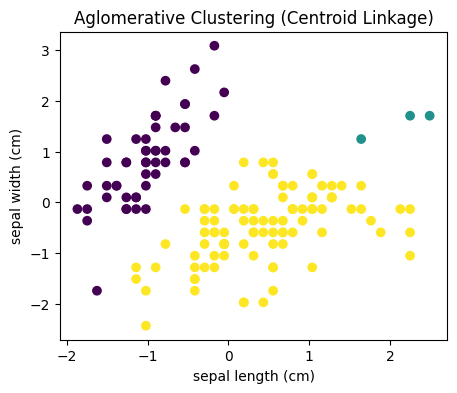


📊 Perbandingan Hasil Clustering Dataset Iris:
          Metode  Silhouette Score
         K-Means          0.479881
  Single Linkage          0.504646
Complete Linkage          0.449618
 Average Linkage          0.480267
Centroid Linkage          0.480267


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

# 1. Load dan Normalisasi Dataset Iris
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Inisialisasi List untuk Menyimpan Hasil
results = []

# 3. K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
score_kmeans = silhouette_score(X_scaled, kmeans_labels)
results.append(("K-Means", score_kmeans))

plt.figure(figsize=(5, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# 4. Agglomerative Clustering: Single, Complete, Average
linkages = ['single', 'complete', 'average']

for link in linkages:
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results.append((link.capitalize() + " Linkage", score))

    plt.figure(figsize=(5, 4))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f"Aglomerative Clustering ({link.capitalize()} Linkage)")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

# 5. Centroid Linkage (menggunakan SciPy)
Z = linkage(X_scaled, method='centroid')
labels_centroid = fcluster(Z, t=3, criterion='maxclust')
score_centroid = silhouette_score(X_scaled, labels_centroid)
results.append(("Centroid Linkage", score_centroid))

plt.figure(figsize=(5, 4))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_centroid, cmap='viridis')
plt.title("Aglomerative Clustering (Centroid Linkage)")
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

# 6. Rekapitulasi Nilai Silhouette Score
df_results = pd.DataFrame(results, columns=["Metode", "Silhouette Score"])
print("\n📊 Perbandingan Hasil Clustering Dataset Iris:")
print(df_results.to_string(index=False))
